In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb

from astropy import units as u
from astropy.constants import G
from astropy.io import ascii
from astropy.table import Table
from astropy.timeseries import LombScargle
import astropy.time
import dateutil.parser

from matplotlib import gridspec
import scipy.optimize as sciop
import json
from scipy.stats import mode

from lightkurve import search_targetpixelfile

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

from scipy.stats import binned_statistic

import corner

%matplotlib inline

In [3]:
tessStars = Table.read("./TESS_CTLv8.csv")
print(tessStars.colnames)

['ID', 'version', 'HIP', 'TYC', 'UCAC', 'TWOMASS', 'SDSS', 'ALLWISE', 'GAIA', 'APASS', 'KIC', 'objType', 'typeSrc', 'ra', 'dec', 'POSflag', 'pmRA', 'e_pmRA', 'pmDEC', 'e_pmDEC', 'PMflag', 'plx', 'e_plx', 'PARflag', 'gallong', 'gallat', 'eclong', 'eclat', 'Bmag', 'e_Bmag', 'Vmag', 'e_Vmag', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag', 'TWOMflag', 'prox', 'w1mag', 'e_w1mag', 'w2mag', 'e_w2mag', 'w3mag', 'e_w3mag', 'w4mag', 'e_w4mag', 'GAIAmag', 'e_GAIAmag', 'Tmag', 'e_Tmag', 'TESSflag', 'SPFlag', 'Teff', 'e_Teff', 'logg', 'e_logg', 'MH', 'e_MH', 'rad', 'e_rad', 'mass', 'e_mass', 'rho', 'e_rho', 'lumclass', 'lum', 'e_lum', 'd', 'e_d', 'ebv', 'e_ebv', 'numcont', 'contratio', 'disposition', 'duplicate_id', 'priority', 'eneg_EBV', 'epos_EBV', 'EBVflag', 'eneg_Mass', 'epos_Mass', 'eneg_Rad', 'epos_Rad', 'eneg_rho', 'epos_rho', 'eneg_logg', 'epos_logg', 'eneg_lum', 'epos_lum', 'eneg_dist', 'epos_

In [4]:
Tmag = np.array(tessStars['Tmag'])
dist = np.array(tessStars['d'])
teff = np.array(tessStars['Teff'])
feh = np.array(tessStars['MH'])
logg = np.array(tessStars['logg'])

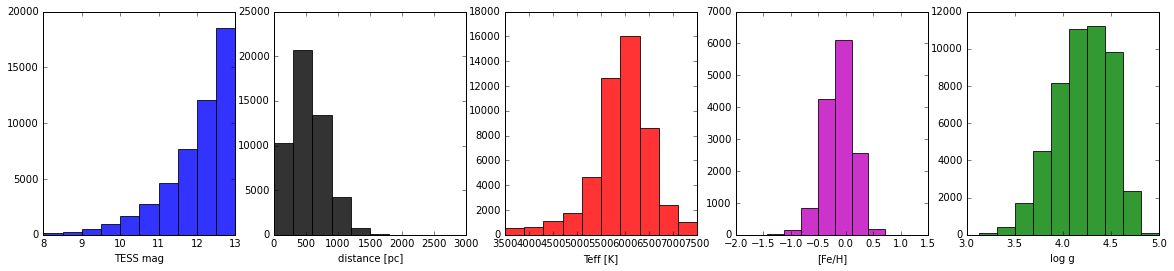

In [7]:
fig, axes = plt.subplots(1,5,figsize=(20,4))

axes[0].hist(Tmag,color='b',alpha=0.8)
axes[1].hist(dist,range=(0,3000),color='k',alpha=0.8)
axes[2].hist(teff,color='r',alpha=0.8)
axes[3].hist(feh,color='m',alpha=0.8)
axes[4].hist(logg,color='g',alpha=0.8)

axes[0].set_xlabel('TESS mag')
axes[1].set_xlabel('distance [pc]')
axes[2].set_xlabel('Teff [K]')
axes[3].set_xlabel('[Fe/H]')
axes[4].set_xlabel('log g')

plt.show()

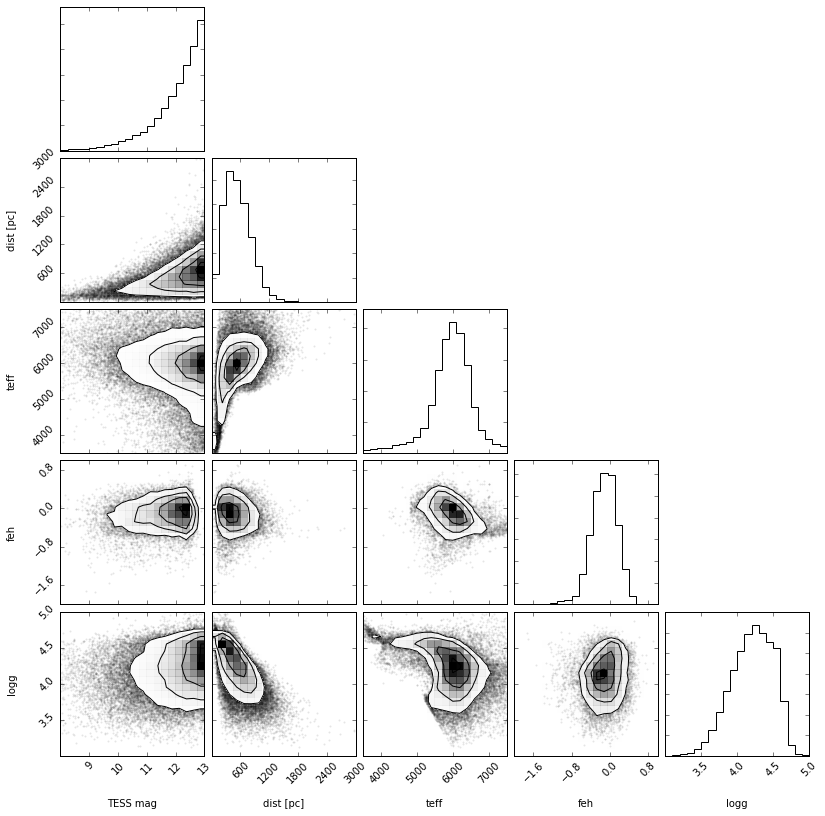

In [9]:
fig = corner.corner(np.vstack((Tmag,dist,teff,feh,logg)).T,labels=['TESS mag', 'dist [pc]','teff','feh','logg'],range=[(8,13),(0,3000),(3500,7500),(-2.0,1.0),(3,5)])
plt.show()

In [2]:
pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download()

<AxesSubplot:title={'center':'Target ID: 8462852, Cadence: 66714'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

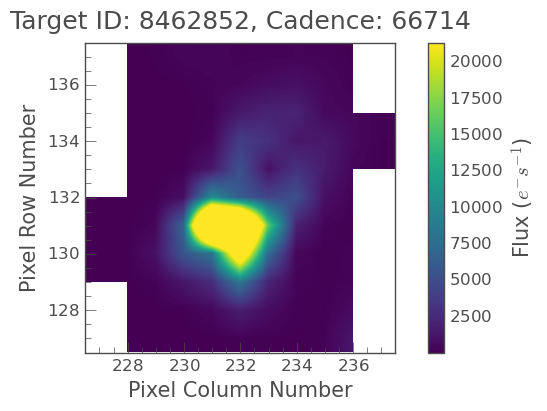

In [3]:
pixelfile.plot(frame=1)

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

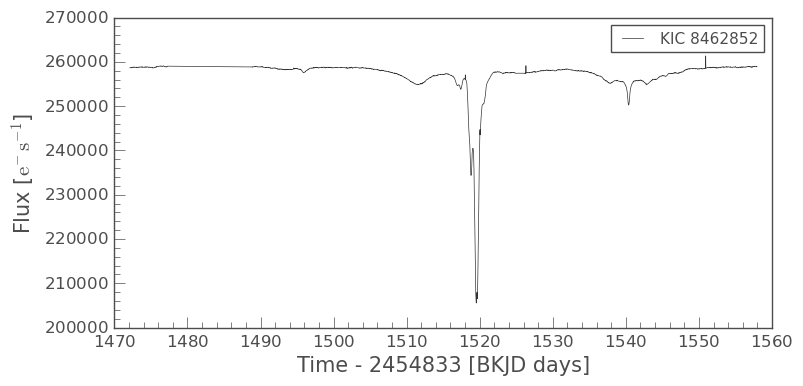

In [6]:
lc = pixelfile.to_lightcurve(aperture_mask='all')
lc.plot()